Big Data

In [44]:
import numpy as np 
import matplotlib.pyplot as plt
f = "C:/Users/HP/OneDrive/Documents/Study/AI/mnist.npz"
D = np.load(f)
print(list(D.keys()))


['train_labels', 'train_imgs', 'test_labels', 'test_imgs']


In [45]:
trn_lbl = D['train_labels']
trn_img = D['train_imgs']
print(trn_lbl)
print(trn_img)

[5 0 4 ... 5 6 8]
[[[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 ...

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255

In [46]:
lbls, cnts = np.unique(trn_lbl,
return_counts = True )
for n in range(10):
    print(f"{lbls[n]} : {cnts[n]}")

0 : 5923
1 : 6742
2 : 5958
3 : 6131
4 : 5842
5 : 5421
6 : 5918
7 : 6265
8 : 5851
9 : 5949


In [47]:
imgs = trn_img[trn_lbl == 0]
print(imgs.shape)

(5923, 28, 28)


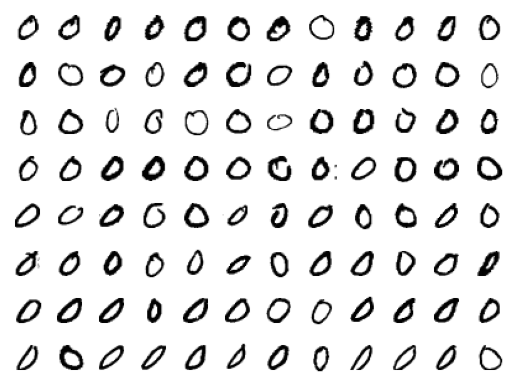

In [48]:
sz_r, sz_c = 8, 12
_, ax_lst = plt.subplots(nrows= sz_r, ncols= sz_c)
n = 0
for n_r in range(sz_r):
    for n_c in range(sz_c):
        ax = ax_lst[n_r][n_c]
        ax.set_axis_off()
        ax.imshow(imgs[n], cmap = "gray")
        n += 1

In [49]:
idx = (trn_lbl == 0) | (trn_lbl == 1)
lbls =trn_lbl[idx]
imgs = trn_img[idx]
sz = imgs.shape[0]
print(sz)

12665


In [50]:
areas = np.zeros(sz)
for n in range(sz):
    areas[n] = np.sum(imgs[n]< 128)

C:\Users\HP\AppData\Local\Temp\ipykernel_18896\787570249.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  _ = plt.boxplot(data, labels= ['0','1'])


Text(0, 0.5, 'Area')

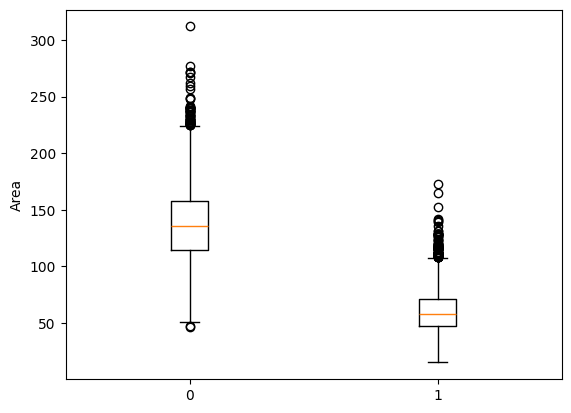

In [51]:
data = [areas[lbls == 0], areas[lbls == 1]]
_ = plt.boxplot(data, labels= ['0','1'])
plt.ylabel("Area")

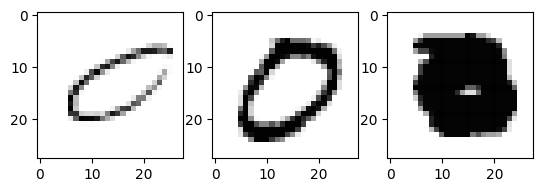

In [52]:
idx = lbls == 0 
x_areas = areas[idx]
x_imgs = imgs[idx]
x_imgs = x_imgs[np.argsort(x_areas)]
_, ax_lst = plt.subplots(ncols = 3)
ax_lst[0].imshow(x_imgs[0], cmap="gray")
ax_lst[1].imshow(x_imgs[3000], cmap="gray")
ax_lst[2].imshow(x_imgs[-1], cmap="gray")

plt.show()


In [53]:
def check_feat(imgs, lbls, feat):
    lbl_uniq = np.unique(lbls)
    data = [feat[lbls == n] for n in lbl_uniq]
    _ = plt.boxplot(data, labels = lbl_uniq)
    
    idx_sample = [0, 3000, -1]
    nrows, ncols = len(lbl_uniq), len(idx_sample)
    _, ax_lst = plt.subplots(nrows=nrows , ncols = ncols)
    for n_r in range(nrows):
        idx = lbls ==lbl_uniq[n_r]
        x_feat = feat[idx]
        x_imgs = imgs[idx]
        idx = np.argsort(x_feat)
        x_imgs = x_imgs[idx]
        x_feat = x_feat[idx]
        for n_c in range(ncols):
            ax = ax_lst[n_r][n_c]
            ax.set_axis_off()
            n_samp = idx_sample[n_c]
            ax.imshow(x_imgs[n_samp], cmap = "gray")
            ax.text(0,0, x_feat[n_samp], c='r')
    



C:\Users\HP\AppData\Local\Temp\ipykernel_18896\1021412696.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  _ = plt.boxplot(data, labels = lbl_uniq)


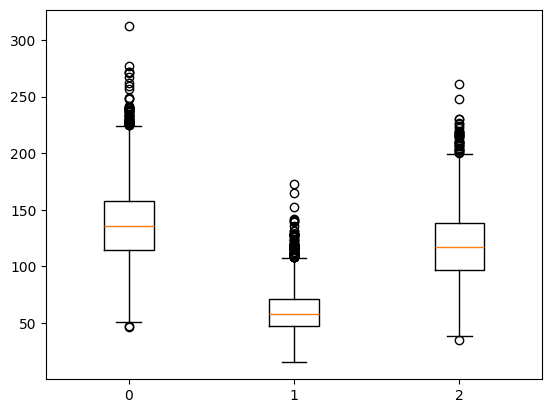

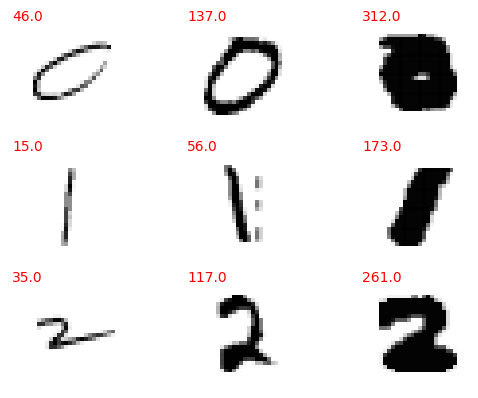

In [54]:
idx = (trn_lbl >= 0 ) & (trn_lbl <= 2)
lbls = trn_lbl[idx]
imgs = trn_img[idx]
sz = imgs.shape[0]
areas = np.zeros(sz)
for n in range(sz):
    areas[n] = np.sum(imgs[n]<128)

check_feat(imgs, lbls, areas)


C:\Users\HP\AppData\Local\Temp\ipykernel_18896\1021412696.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  _ = plt.boxplot(data, labels = lbl_uniq)


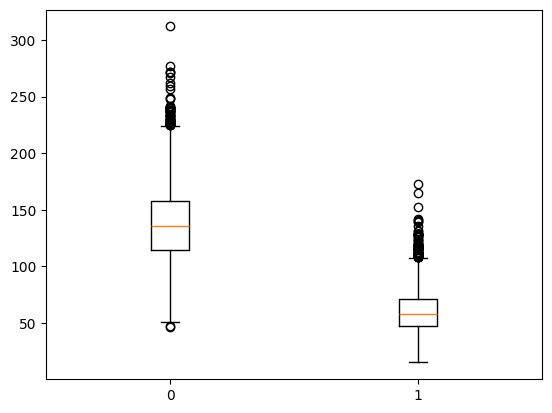

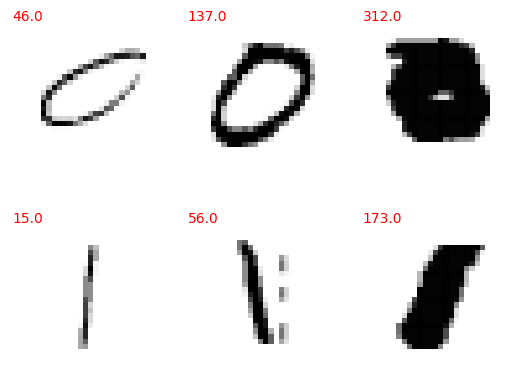

In [55]:
idx = (trn_lbl == 0 ) | (trn_lbl == 1 )
lbls = trn_lbl[idx]
imgs = trn_img[idx]
sz = imgs.shape[0]
areas = np.zeros(sz)
for n in range(sz):
    areas[n] = np.sum(imgs[n]<128)

check_feat(imgs, lbls, areas)

In [56]:
preds = (areas < 100).astype(int)
acc = np.sum(lbls == preds) / preds.size
print(f"Accuracy : {acc*100 : .1f}%")

Accuracy :  92.7%


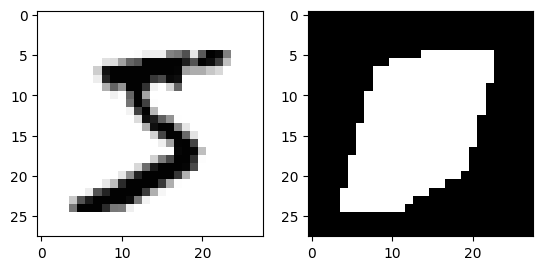

In [57]:
from skimage import morphology
img = trn_img[0]
bw = morphology.convex_hull_image(img < 128)
_, (ax1, ax2) = plt.subplots(ncols = 2)
ax1.imshow(img, cmap = "gray")
ax2.imshow(bw, cmap = "gray")

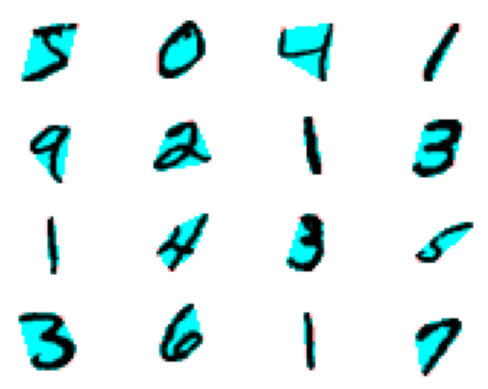

In [58]:
sz_r, sz_c = 4, 4
_, ax_lst = plt.subplots(nrows= sz_r, ncols= sz_c)
n = 0 
for n_r in range(sz_r):
    for n_c in range(sz_c):
        ax = ax_lst[n_r][n_c]
        ax.set_axis_off()
        img = trn_img[n]
        bw = morphology.convex_hull_image(img < 128)
        img_rgb = np.stack([~bw*255, img, img], axis = 2)
        ax.imshow(img_rgb)
        n +=1

In [59]:
hulls = np.zeros(sz)
for n in range(sz):
    bw = morphology.convex_hull_image(imgs[n])
    hulls[n] = np.sum(bw)

In [60]:
preds = (hulls < 130).astype(int)
acc = np.sum(lbls == preds) / preds.size
print(f"Accuracy : {acc*100 : .1f}%")

Accuracy :  46.8%


C:\Users\HP\AppData\Local\Temp\ipykernel_18896\1021412696.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  _ = plt.boxplot(data, labels = lbl_uniq)


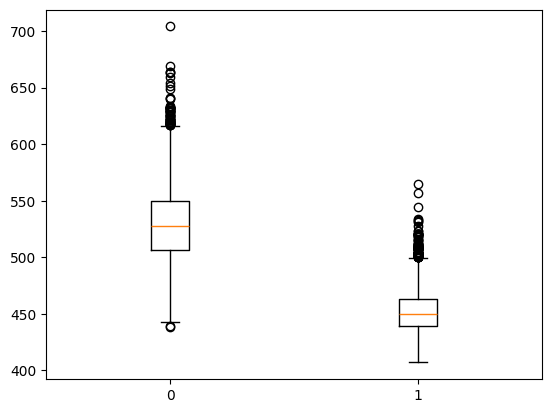

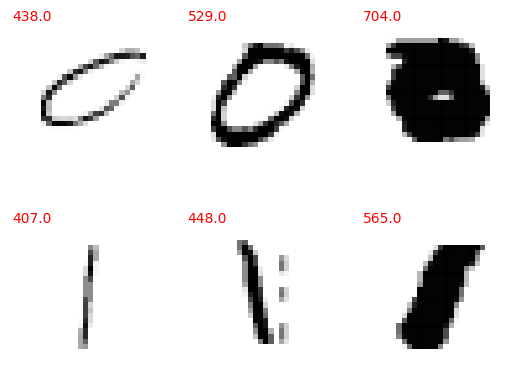

In [61]:
combined = areas + 0.5*hulls
check_feat(imgs, lbls, combined)

In [62]:
preds = (areas < 180).astype(int)
acc = np.sum(lbls == preds) / preds.size
print(f"Accuracy : {acc*100 : .1f}%")

Accuracy :  58.1%


In [63]:
sz = lbls.size
hulls = np.zeros(sz)
for n in range(sz):
    bw = morphology.convex_hull_image(imgs[n]<128)
    hulls[n]=np.sum(bw)

In [64]:
preds2 = (hulls < 130).astype(int)
acc = np.sum(lbls == preds2) / preds2.size
print(f"Accuracy : {acc*100 : .1f}%")

Accuracy :  97.6%
